<h1 align="center" style="font-variant: small-caps">Tutorial: How to build a genome-scale GBA model</h1>
<h2 align="center">INTRODUCTION</h2>
<h5 align="center">(<code>Version 4</code>, January 2025, Charles Rocabert)</h5>

<div align="center" style="max-width:100px;display:block;margin:auto;">

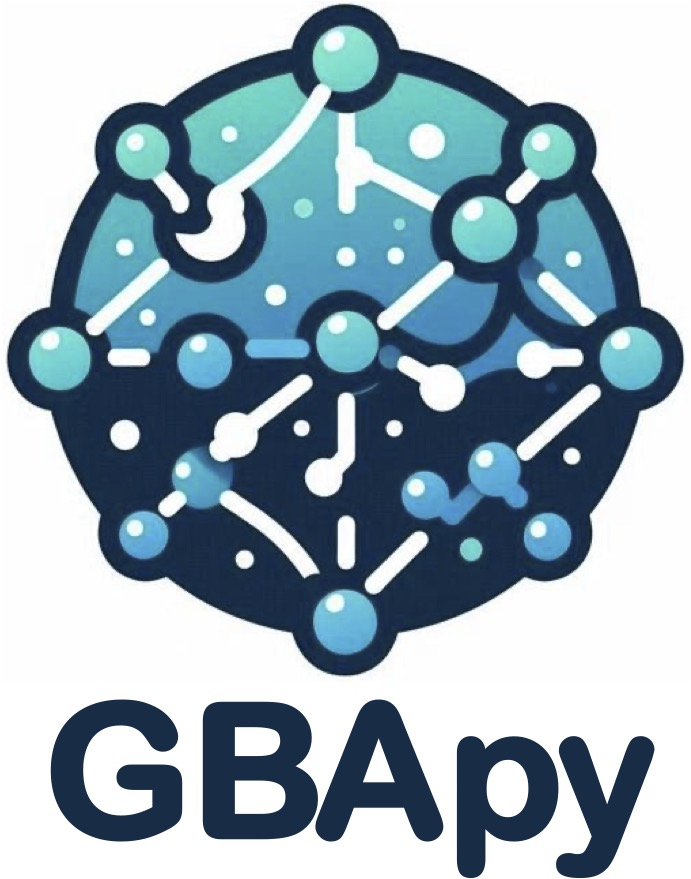

</div>

# Table of content

- [1. The <strong>GBApy</strong> module](#gbapy)
- [2. Constructing a genome-scale GBA model: how-to](#introduction)
  - [Step 1: Collect data](#introduction_1)
  - [Step 2: Check and correct the consistency of the model](#introduction_2)
  - [Step 3: Edit and compress the model](#introduction_3)
  - [Step 4: Build the GBA model](#introduction_4)
  - [Step 5 (Optional): Reduce the problem to a full column rank problem](#introduction_5)

# 1. The <strong>GBApy</strong> module <a id="gbapy"></a>

<strong>GBApy</strong> has been specifically developed to handle GBA models. 
It is versatile, easy to use, and allows to build, test and optimize models of any size, including genome-scale models.
Ultimately, <strong>GBApy</strong> provides tools to simulate evolution and predict the future adaptation steps of the organism of interest.

<strong>GBApy</strong> is distributed as a Python module on Pypi (see https://github.com/charlesrocabert/gbapy for installation instructions, and for documentation).

# 2. Constructing a genome-scale GBA model: how-to <a id="introduction"></a>

Building a GBA genome-scale usually requires a pre-existing model of the organim of interest. One good start is a pre-published FBA model (usually under SBML format), which can also provides annotation (for example, on the <a href="http://bigg.ucsd.edu/" target="_blank">BiGG database</a>).

To get a functional model, it will be necessary to check for structural inconsistencies which break the mass balance, and to collect an important amount of data to infer metabolite and enzyme molecular masses, as well as kinetic parameters.

A correct annotation is an important step in this process, including metabolites, proteins and enzymes composition. A genome assembly is also usually needed at this step, to extract nucleotide and amino-acid sequence information (<em>e.g.</em> on the <a href="https://www.ncbi.nlm.nih.gov/datasets/genome/" target="_blank">NCBI database</a>).

A good knowledge of organism's biology is also required, in order to increase the realism of the model.

The construction can be divided in many steps (and substeps), presented below:

<div align="center" style="max-width:1000px;display:block;margin:auto;">

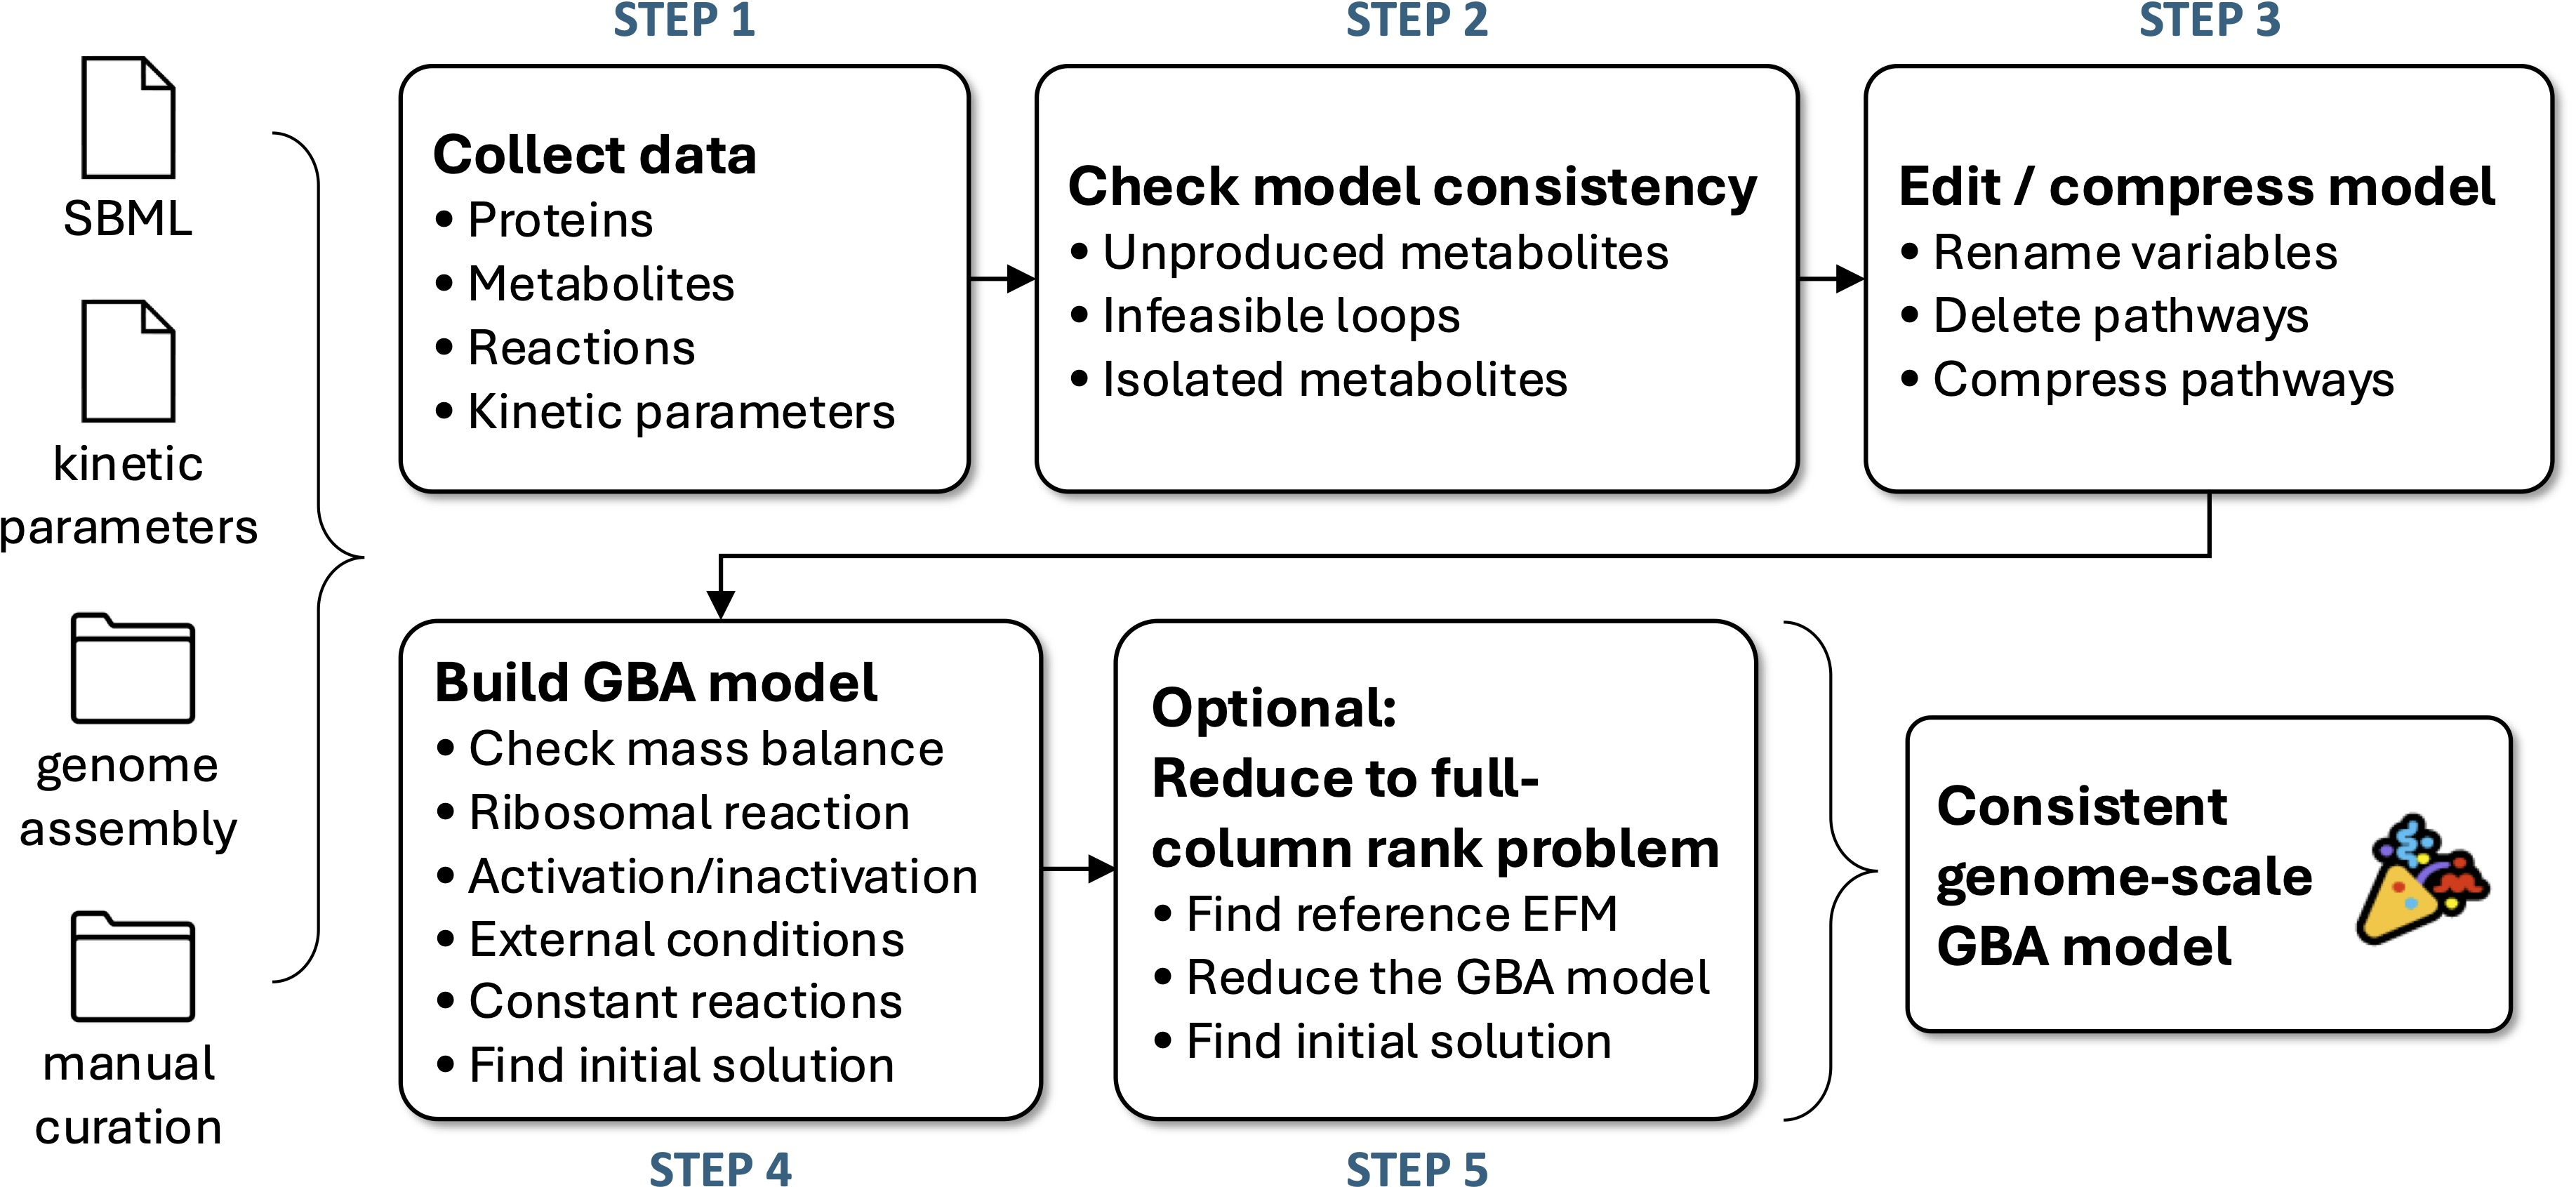

</div>

## Step 1. Collect data <a id="introduction_1"></a>

- 1) Collect all proteins involved in the model, their amino-acid sequences and calculate their molecular masses. If the protein is unknown for one reaction, a dummy protein can be used (<em>e.g.</em> an average protein).
- 2) Collect all metabolites involved in the model. Depending on the nature of the metabolite (DNA, RNA, small molecule, macro-molecule, ...), different solutions are necessary to calculate the molecular masses. <strong>GBApy</strong> provides methods for DNA, RNA and chemical formulas without unspecified radicals (`R`). For other molecules, manual curation is necessary.
- 3) Collect all the reactions, as well as their enzyme composition, except typical FBA pseudo-reactions such as exchange (`R_EX_...`) or biomass reactions (`R_BIOMASS_...`).
- 4) Collect kinetic parameters for each reaction (mainly $K_\text{M}$ and $k_\text{cat}$ values). It can also include inhibition/activation interactions. The user has to collect (<em>e.g.</em> from <a href="https://www.brenda-enzymes.org/" target="_blank">BRENDA database</a>), or predict (<em>e.g.</em> with <a href="https://esp.cs.hhu.de/" target="_blank">DeepMolecules</a>), the kinetic parameter values, before providing them to <strong>GBApy</strong>.

## Step 2. Check and correct the consistency of the model <a id="introduction_2"></a>

- 1) Check for various annotation inconsistencies (missing molecular mass or kinetic parameters, empty objects, ...).
- 2) Check for unproduced metabolites (unproduced metabolites lead to negative concentrations in GBA).
- 3) Check for infeasible loops (unproduced metabolites hidden in a loop).
- 4) Check for isolated metabolites (imported but never used; it is usually the case for metabolites that only relate to the FBA biomass function).

## Step 3. Edit and compress the model <a id="introduction_3"></a>

- 1) Edit reactions and metabolite names to fit GBA formalism (by convention, external metabolites receive a prefix `c_`; internal metabolites have no prefix/suffix).
- 2) Remove unnecessary and/or simplify pathways. This step is at the user modeling choice.

## Step 4. Build the GBA model <a id="introduction_4"></a>

- 1) Check for mass balance. It is usually necessary to adjust the mass of a few metabolites to keep mass balance.
- 2) Collect information to build external conditions (<em>e.g.</em> from the medium content).
- 3) Find one initial solution. <strong>GBApy</strong> routines will help to find one.

## Step 5 (Optional). reduce the problem to a full column-rank problem <a id="introduction_5"></a>

By reducing the internal mass fraction matrix to a full column rank matrix, we guarantee a convex GBA problem and the existence of a single optimal growth rate.
A good approach is to identify an EFM and to remove inactive reactions.

To guide the user towards a functional genome-scale GBA model, we wrote a complete tutorial using the synthetic minimal cell (<a href="https://www.nature.com/articles/s41586-023-06288-x" target="_blank">Moger-Reischer et al. 2023</a>), which has the advantage of being the living organism with the smallest number of genes known on earth.

The small size of its metabolic network will facilitate the construction of a genome-scale model.